### Edgar Moises Hernandez-Gonzalez
#### 08/07/19-06/02/20
#### Clasificar habla imaginada en EEG con CNN-2D con 1 capa

In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [0]:
datos = pd.read_csv("/content/drive/My Drive/HablaImaginadaDL/Submuestreo01.csv", header=None)
x = datos.iloc[:, 0:3072]
y = datos.iloc[:, 3072]

In [0]:
print(x.shape)
print(y.shape)

(132, 3072)
(132,)


In [0]:
n_samples = len(y)
print("n_samples:", n_samples)

n_samples: 132


In [0]:
n_classes = len(np.unique(y))
print("n_classes:", n_classes)

n_classes: 6


In [0]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
x = StandardScaler().fit_transform(x)

In [0]:
#convertir de 2D a 4D
x = x.reshape((n_samples, 6, 512, 1))
print(x.shape)

(132, 6, 512, 1)


In [0]:
#dividir en train y test
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [0]:
model = Sequential()
model.add(Conv2D(8, (3, 7), activation='relu', input_shape=(6, 512, 1)))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
optimizer = Adam(lr=1e-4)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 4, 506, 8)         176       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 2, 253, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4048)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                259136    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 259,702
Trainable params: 259,702
Non-trainable params: 0
__________________________________________________

In [0]:
history = model.fit(x_train, y_train, epochs = 40, batch_size = 64,
                    validation_data=(x_test, y_test))

Train on 99 samples, validate on 33 samples
Epoch 1/40
99/99 [==============================] - 7s 70ms/sample - loss: 2.0627 - acc: 0.1717 - val_loss: 1.8452 - val_acc: 0.1818
Epoch 2/40
99/99 [==============================] - 0s 150us/sample - loss: 1.8932 - acc: 0.1616 - val_loss: 1.8521 - val_acc: 0.1515
Epoch 3/40
99/99 [==============================] - 0s 135us/sample - loss: 1.7848 - acc: 0.2121 - val_loss: 1.8490 - val_acc: 0.1212
Epoch 4/40
99/99 [==============================] - 0s 140us/sample - loss: 1.8450 - acc: 0.1919 - val_loss: 1.8470 - val_acc: 0.1515
Epoch 5/40
99/99 [==============================] - 0s 136us/sample - loss: 1.7440 - acc: 0.2424 - val_loss: 1.8481 - val_acc: 0.1212
Epoch 6/40
99/99 [==============================] - 0s 120us/sample - loss: 1.6408 - acc: 0.3535 - val_loss: 1.8518 - val_acc: 0.1515
Epoch 7/40
99/99 [==============================] - 0s 135us/sample - loss: 1.6249 - acc: 0.3939 - val_loss: 1.8533 - val_acc: 0.1212
Epoch 8/40
99/99 [=

In [0]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

33/33 [==============================] - 0s 930us/sample - loss: 1.8855 - acc: 0.1818
Test loss: 1.8854908003951565
Test accuracy: 0.18181819


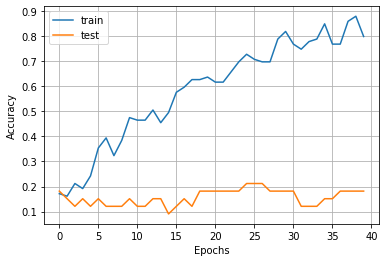

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

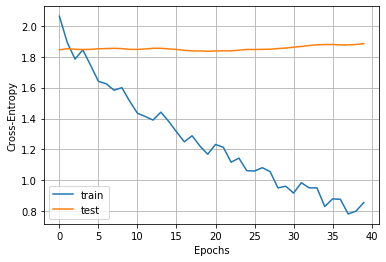

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend(['train', 'test'])
plt.show()